MMDetection 설치

In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection;python setup.py install

MS-COCO 데이터 기반으로 Faster RCNN Pretrained 모델을 활용하여 Inference 수행

In [ ]:
# https://github.com/open-mmlab/mmdetection/tree/master/configs/faster_rcnn#results-and-models
# MS COCO 데이터 셋에서 사전 훈련된 model 이용
!cd mmdetection;mkdir pretrained_model
!wget -O /content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2022-06-22 02:14:07--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.18
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.18|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  11.0MB/s    in 15s     

2022-06-22 02:14:23 (10.4 MB/s) - ‘/content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [ ]:
from mmdet.apis import init_detector, inference_detector

# (1) 절대 경로로 불러오기
config_file="/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py"
premodel_file="/content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth"

model=init_detector(config_file,premodel_file,device="cuda:0")

load checkpoint from local path: /content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [ ]:
!pwd

/content


In [ ]:
# (2) 상대 경로로 불러오기
from mmdet.apis import init_detector, inference_detector

%cd mmdetection

config_file="configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py"
model_file="checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth"

model_1=init_detector("configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py",
                      "pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth")

In [ ]:
%cd /content

/content


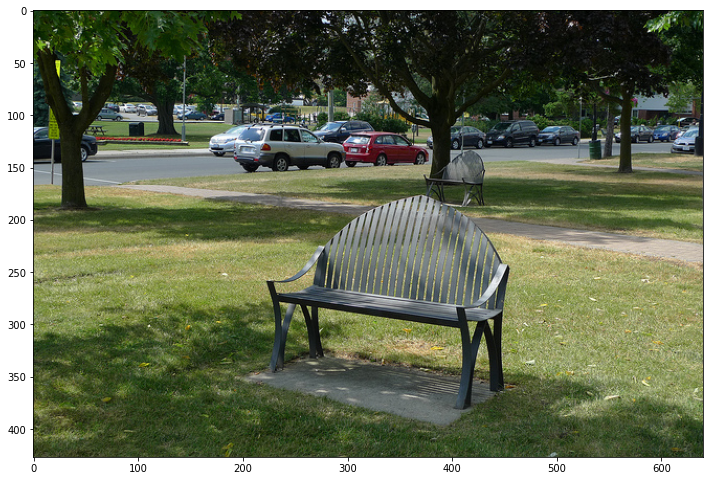

In [ ]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("/content/mmdetection/demo/demo.jpg")
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,14))
plt.imshow(img_rgb)

In [ ]:
img=cv2.imread("/content/mmdetection/demo/demo.jpg")

result=inference_detector(model,img)
# len의 결과가 80개, 즉 cocodata의 class가 80개
print(type(result),len(result))

<class 'list'> 80


In [ ]:
# 개별 array들은 각 클래스별로 5개의 값(좌표값과 class별로 confidence)을 가짐. 
# 좌표는 좌상단(xmin, ymin), 우하단(xmax, ymax) 기준. 
result

[array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
         1.35454804e-01],
        [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
         8.88788104e-02],
        [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
         7.20716417e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[6.09650024e+02, 1.13805901e+02, 6.34511658e+02, 1.36951904e+02,
         9.88766015e-01],
        [4.81773712e+02, 1.10480995e+02, 5.22459717e+02, 1.30407104e+02,
         9.87157285e-01],
        [1.01821303e+00, 1.12144722e+02, 6.04374390e+01, 1.44173752e+02,
         9.83206093e-01],
        [2.94623749e+02, 1.17035233e+02, 3.78022675e+02, 1.50550873e+02,
         9.71326888e-01],
        [3.96328979e+02, 1.11203323e+02, 4.32490540e+02, 1.32729263e+02,
         9.67802048e-01],
        [5.90976318e+02, 1.10802658e+02, 6.15401917e+02, 1.26493553e+02,
         9.59414959e-01],
        [2.67582001e+02, 1.05686005e+02, 3.28818756

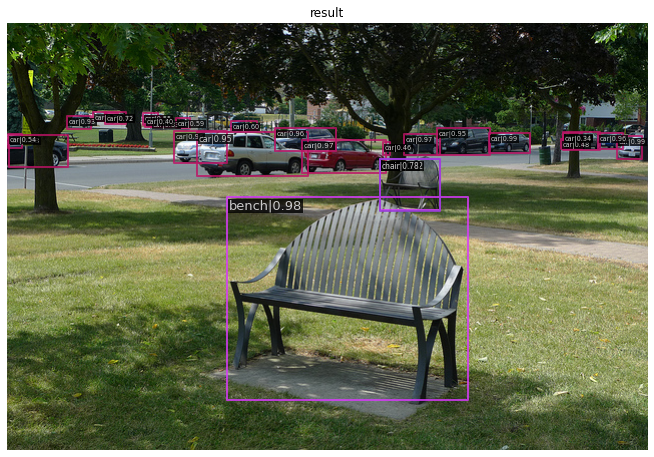

In [ ]:
from mmdet.apis import show_result_pyplot

show_result_pyplot(model,img,result)

Model의 Config 설정 확인하기

In [ ]:
model.__dict__

{'CLASSES': ('person',
  'bicycle',
  'car',
  'motorcycle',
  'airplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic_light',
  'fire_hydrant',
  'stop_sign',
  'parking_meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  'backpack',
  'umbrella',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports_ball',
  'kite',
  'baseball_bat',
  'baseball_glove',
  'skateboard',
  'surfboard',
  'tennis_racket',
  'bottle',
  'wine_glass',
  'cup',
  'fork',
  'knife',
  'spoon',
  'bowl',
  'banana',
  'apple',
  'sandwich',
  'orange',
  'broccoli',
  'carrot',
  'hot_dog',
  'pizza',
  'donut',
  'cake',
  'chair',
  'couch',
  'potted_plant',
  'bed',
  'dining_table',
  'toilet',
  'tv',
  'laptop',
  'mouse',
  'remote',
  'keyboard',
  'cell_phone',
  'microwave',
  'oven',
  'toaster',
  'sink',
  'refrigerator',
  'book',
  'clock',
  'vase',
  'scissors',
  'teddy_bear',


show_result_pyplot()을 이용하지 않고, inference 결과를 image로 표현하기

In [ ]:
# inference 결과를 image로 표현하기

labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mmdet.apis import init_detector, inference_detector


def get_detected_img(img,model,score_threshold,rect_thick,text_size):

  draw_img=img.copy()

  results=inference_detector(model,img)

  for index, result in enumerate(results):

    if len(result)==0:
      continue
    # np.where를 쓴 이유는 2차원 array이기 때문에 Loop를 돌리는거 보다 한방에 해결할수 있기때문에 사용함
    result_filtered=result[np.where(result[:,4]>score_threshold)]

    for i in range(len(result_filtered)):
      
      left=int(result_filtered[i,0])
      top=int(result_filtered[i,1])
      right=int(result_filtered[i,2])
      bottom=int(result_filtered[i,3])

      caption="{} : {:.4f}".format(labels_to_names_seq[index],result_filtered[i,4])
      print(caption)

      cv2.rectangle(draw_img,(left,top),(right,bottom),color=(0,0,255),thickness=rect_thick)
      cv2.putText(draw_img,caption,(left,top-5),cv2.FONT_HERSHEY_SIMPLEX,text_size,(0,255,0),1)

  return draw_img


load checkpoint from local path: /content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
car : 0.9888
car : 0.9872
car : 0.9832
car : 0.9713
car : 0.9678
car : 0.9594
car : 0.9593
car : 0.9568
car : 0.9510
car : 0.9459
car : 0.9440
car : 0.9331
car : 0.8663
car : 0.8268
car : 0.7535
car : 0.7166
car : 0.6008
car : 0.5920
car : 0.5540
car : 0.5435
car : 0.4768
car : 0.4612
car : 0.4010
car : 0.3439
bench : 0.9778
bench : 0.4170
chair : 0.7779


/usr/local/lib/python3.7/dist-packages/mmdet-2.25.0-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


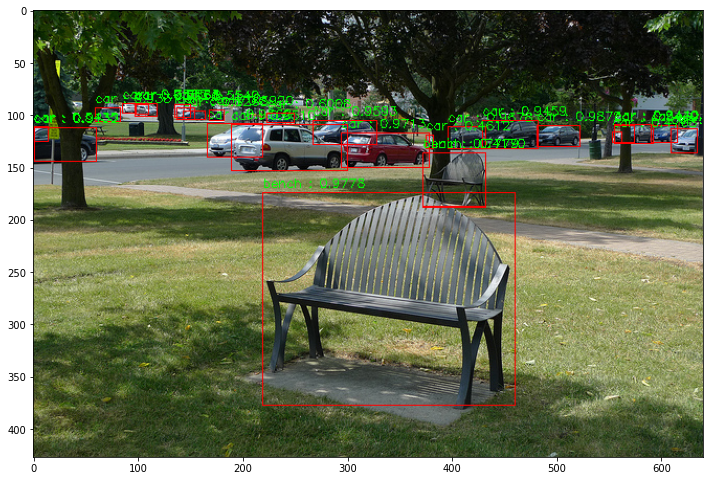

In [ ]:
img=cv2.imread("/content/mmdetection/demo/demo.jpg")

config_file="/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py"
pre_model_file="/content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth"

model=init_detector(config_file,pre_model_file)

draw_img=get_detected_img(img,model,0.3,1,0.4)
draw_img_rgb=cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,14))
plt.imshow(draw_img_rgb)

In [ ]:
!mkdir ./data
!wget -O ./data/road.jpg https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/images/road.jpg

--2022-06-22 02:26:11--  https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/images/road.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256400 (250K) [image/jpeg]
Saving to: ‘./data/road.jpg’

./data/road.jpg     100%[===================>] 250.39K  --.-KB/s    in 0.04s   

2022-06-22 02:26:11 (6.45 MB/s) - ‘./data/road.jpg’ saved [256400/256400]



person : 0.9960
person : 0.9746
person : 0.9696
person : 0.9352
person : 0.9086
person : 0.9049
motorbike : 0.9940
motorbike : 0.7937
motorbike : 0.7598
umbrella : 0.9900
umbrella : 0.9888
umbrella : 0.6344
chair : 0.8776
chair : 0.8605
chair : 0.6877


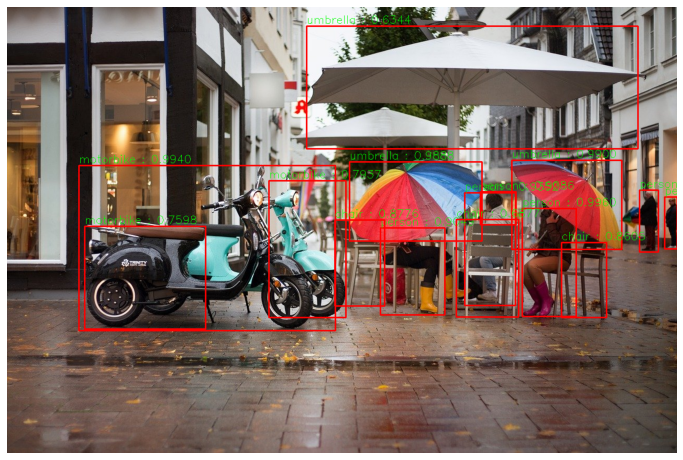

In [ ]:
img=cv2.imread("/content/data/road.jpg")

draw_img = get_detected_img(img,model,0.6,2,0.7)
draw_img_rgb = cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,14))
plt.axis("off")
plt.imshow(draw_img_rgb)

# Video Inference 수행

In [ ]:
!wget -O /content/data/Motorcycle.mp4 https://github.com/HyeBin-Hub/Lesson-Object_Detection/blob/main/videos/Motorcycle.mp4?raw=true

--2022-06-22 02:29:39--  https://github.com/HyeBin-Hub/Lesson-Object_Detection/blob/main/videos/Motorcycle.mp4?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/HyeBin-Hub/Lesson-Object_Detection/raw/main/videos/Motorcycle.mp4 [following]
--2022-06-22 02:29:39--  https://github.com/HyeBin-Hub/Lesson-Object_Detection/raw/main/videos/Motorcycle.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/videos/Motorcycle.mp4 [following]
--2022-06-22 02:29:40--  https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/videos/Motorcycle.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent

In [ ]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }


In [ ]:
from mmdet.apis import init_detector, inference_detector

config_file="/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py"
pre_model_file="/content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth"

model=init_detector(config_file,pre_model_file)

load checkpoint from local path: /content/mmdetection/pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [ ]:
def get_detected_video(input_file_path,output_file_path,score_threshold):

  cap=cv2.VideoCapture(input_file_path)

  codec=cv2.VideoWriter_fourcc(*"XVID")

  video_size=(round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

  video_fps=cap.get(cv2.CAP_PROP_FPS)

  video_write=cv2.VideoWriter(output_file_path,codec,video_fps,video_size)

  frame_cnt=cap.get(cv2.CAP_PROP_FRAME_COUNT)
  print("총 Frame 갯수 : ",frame_cnt)

  while 1:
    hasFrame,ImgFrame=cap.read()
    
    if not hasFrame:
      print("더 이상 처리할 Frame이 없습니다")
      break
      
    img=get_detected_img(ImgFrame,model,score_threshold,1,0.4)

    video_write.write(img)

  video_write.release()
  cap.release()




In [ ]:
get_detected_video("/content/data/Motorcycle.mp4",
                   "/content/data/Motorcycle_out.mp4",
                   score_threshold=0.3)

총 Frame 갯수 :  321.0
person : 0.9976
person : 0.9911
person : 0.9796
person : 0.9653
person : 0.9553
person : 0.7140
person : 0.6514
car : 0.9932
car : 0.9136
motorbike : 0.9737
motorbike : 0.9670
motorbike : 0.9446
stop sign : 0.9107
cell phone : 0.8855
person : 0.9982
person : 0.9923
person : 0.9847
person : 0.9820
person : 0.9558
person : 0.7830
person : 0.6932
car : 0.9948
car : 0.8968
motorbike : 0.9768
motorbike : 0.9732
motorbike : 0.9389
stop sign : 0.8543
handbag : 0.5368
cell phone : 0.9129
person : 0.9981
person : 0.9912
person : 0.9894
person : 0.9832
person : 0.9547
person : 0.6420
person : 0.5630
car : 0.9973
car : 0.9174
motorbike : 0.9796
motorbike : 0.9753
motorbike : 0.9325
stop sign : 0.7900
handbag : 0.3785
skateboard : 0.3186
cell phone : 0.9050
person : 0.9978
person : 0.9909
person : 0.9899
person : 0.9828
person : 0.9549
person : 0.7081
person : 0.4886
car : 0.9973
car : 0.9154
motorbike : 0.9813
motorbike : 0.9710
motorbike : 0.9504
stop sign : 0.8105
cell phone